Step 1:Collect Data: UCI Parkinson's Disease Classification Data Set

Step 2: Eigendecomposition - Eigenvalues, Eigenvectors and Eigenspace

Step 3: Primary Component Selection

Step 4: Projection New Feature Space

Step 5: Principal Component Analysis (PCA)

Step 6:  Comparison Accurancy 6 Machine Learning Models : before-after PCA

1. Model : Logistic Regression
2. Model : Support Vector Machines (SVM)
3. Model : Decision Tree Classifier
4. Model : KNN(k-nearest neighbors algorithm)
5. Model : Random Forest Classifier
6. Model: Gaussian Naive Bayes


In [7]:
import os 
os.chdir("/content/drive/MyDrive/PCA and Mathematics")
!ls

 IMDb1.csv			 pd_speech_features.rar


## **Step 1:Collect Data: UCI Parkinson's Disease Classification Data Set**
https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00470/pd_speech_features.rar


--2021-01-17 00:54:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00470/pd_speech_features.rar
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2139993 (2.0M) [application/x-httpd-php]
Saving to: ‘pd_speech_features.rar.3’

pd_speech_features. 100%[===================>]   2.04M  3.72MB/s    in 0.5s    

2021-01-17 00:54:16 (3.72 MB/s) - ‘pd_speech_features.rar.3’ saved [2139993/2139993]



In [ ]:
!unrar x pd_speech_features.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from pd_speech_features.rar


Would you like to replace the existing file pd_speech_features.csv
5308926 bytes, modified on 2018-11-05 15:35
with a new one
5308926 bytes, modified on 2018-11-05 15:35

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

**Data Set Information:**

The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.


**Attribute Information:**

Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.


**Relevant Papers:**

Provide references to papers that have cited this data set in the past (if any).

In [8]:
import pandas as pd
df = pd.read_csv("pd_speech_features.csv") # import dataset 

df

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Intensity Parameters,Unnamed: 24,Unnamed: 25,Formant Frequencies,Unnamed: 27,Unnamed: 28,Unnamed: 29,Bandwidth Parameters,Unnamed: 31,Unnamed: 32,Unnamed: 33,Vocal Fold,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 715,Unnamed: 716,Unnamed: 717,Unnamed: 718,Unnamed: 719,Unnamed: 720,Unnamed: 721,Unnamed: 722,Unnamed: 723,Unnamed: 724,Unnamed: 725,Unnamed: 726,Unnamed: 727,Unnamed: 728,Unnamed: 729,Unnamed: 730,Unnamed: 731,Unnamed: 732,Unnamed: 733,Unnamed: 734,Unnamed: 735,Unnamed: 736,Unnamed: 737,Unnamed: 738,Unnamed: 739,Unnamed: 740,Unnamed: 741,Unnamed: 742,Unnamed: 743,Unnamed: 744,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,0.00067,0.00129,0.002,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.9974958,76.08804597,72.46551224,539.3427351,1031.84904,2447.162183,3655.054806,101.0922179,83.14744022,255.21483,396.6436311,0.77778,11.7245,2.8277,1.173,0.26512,0.083127,...,0.071728,0.010352,-2.7303,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.155,2.9457,2.1993,1.983,1.8314,2.0062,1.6058,1.5466,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,0.00052,0.00112,0.00157,0.05516,0.502,0.0232,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.41590313,73.04637365,71.52894525,564.3636145,1016.367294,2383.565201,3498.681572,58.4654278,86.48729245,248.3571266,218.2297224,0.8125,13.8284,2.8908,1.0221,0.22004,0.12741,...,0.72933,0.78041,5.2294,8643.986,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.047,1.5772,1.553,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.66170618,71.6335491,68.08658253,548.4446038,1032.406341,2357.82695

**Step 2: Data Cleaning and Data Manipulation**

In [9]:
df.columns = df.iloc[0]
df = df.iloc[1:,].reindex()
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,0.00067,0.00129,0.002,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.9974958,76.08804597,72.46551224,539.3427351,1031.84904,2447.162183,3655.054806,101.0922179,83.14744022,255.21483,396.6436311,0.77778,11.7245,2.8277,1.173,0.26512,0.083127,...,0.071728,0.010352,-2.7303,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.155,2.9457,2.1993,1.983,1.8314,2.0062,1.6058,1.5466,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,0.00052,0.00112,0.00157,0.05516,0.502,0.0232,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.41590313,73.04637365,71.52894525,564.3636145,1016.367294,2383.565201,3498.681572,58.4654278,86.48729245,248.3571266,218.2297224,0.8125,13.8284,2.8908,1.0221,0.22004,0.12741,...,0.72933,0.78041,5.2294,8643.986,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.047,1.5772,1.553,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.66170618,71.6335491,68.08658253,548.4446038,1032.406341,2357.826954,3678.128717,160.387771,54.68516803,151.694847,84.24033898,0.81818,26.9273,2.6975,0.84951,0.15756,0.11689,...,0.26951,-0.0055224,0.35054,29.2717,32.4971,38.9453,85.148,62.5132,9.7308,6.889,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55E-05,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.30698902,81.00074938,79.19059268,819.529588,1201.813897,3154.035654,4122.163933,238.6670518,191.9849158,573.7529088,526.1475988,0.98548,139.5744,1.6961,0.83405,0.17295,0.14737,...,0.36692,-0.49265,0.19164,591.0116,65.3827,53.9852,45.4458,34.665,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.912,1.8829,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,

In [4]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', name=0, length=755)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Columns: 755 entries, id to class
dtypes: object(755)
memory usage: 4.4+ MB


**Determining dependent and independent variables of the dataset**

In [10]:
X = df.iloc[:, 0:754].values  # select the independent variables
y = df.iloc[:, 754].values    # select the dependent variable and target column

**Data Standardization**


In [11]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

##Step 2: Eigendecomposition - Eigenvalues, Eigenvectors and Eigenspace 
The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (elementary components) determine the directions of the new feature space, and the eigenvalues determine their size. In other words, eigenvalues describe the variance of the data along the new feature axes. Covariance Matrix The classical approach to PCA is to perform eigende composition on the covariance matrix, which is a matrix in which each element represents the covariance between two features. The covariance between two properties is calculated as follows:

Cov(X,Y)=∑(xi−x¯)(yi−y¯)N−1


**Compute the covariance matrix**

In [12]:
import numpy as np

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X) # another method 
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0013245  -0.13378215  0.02670192 ... -0.05811108 -0.05788379
  -0.05584903]
 [-0.13378215  1.0013245   0.01018855 ...  0.12910653  0.10787687
   0.10496656]
 [ 0.02670192  0.01018855  1.0013245  ...  0.04623629  0.03743406
   0.03964023]
 ...
 [-0.05811108  0.12910653  0.04623629 ...  1.0013245   0.94926382
   0.7861811 ]
 [-0.05788379  0.10787687  0.03743406 ...  0.94926382  1.0013245
   0.86784425]
 [-0.05584903  0.10496656  0.03964023 ...  0.7861811   0.86784425
   1.0013245 ]]


**The second method for compute the covariance matrix**

In [13]:
print('NumPy covariance matrix: \n%s' %np.cov(X.T))

NumPy covariance matrix: 
[[ 1.0013245  -0.13378215  0.02670192 ... -0.05811108 -0.05788379
  -0.05584903]
 [-0.13378215  1.0013245   0.01018855 ...  0.12910653  0.10787687
   0.10496656]
 [ 0.02670192  0.01018855  1.0013245  ...  0.04623629  0.03743406
   0.03964023]
 ...
 [-0.05811108  0.12910653  0.04623629 ...  1.0013245   0.94926382
   0.7861811 ]
 [-0.05788379  0.10787687  0.03743406 ...  0.94926382  1.0013245
   0.86784425]
 [-0.05584903  0.10496656  0.03964023 ...  0.7861811   0.86784425
   1.0013245 ]]


**Compute the Eigenvalues and Eigenvectors**
We make an identification on the covariance matrix: All three approaches yield the same eigenvectors and eigenvalue pairs: Identification of the covariance matrix after standardizing the data. Essence composition of the correlation matrix.

In [14]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eigenvectors)
print('\nEigenvalues \n%s' %eigenvalues)

Eigenvectors 
[[-7.34343947e-03 -1.16719053e-03  6.51538260e-03 ...  2.94118566e-08
   7.74649711e-09  1.64667103e-08]
 [ 4.50265736e-02 -4.70096509e-02 -6.29257413e-03 ... -4.74610826e-07
   7.66652527e-07  9.21031278e-07]
 [-1.73695965e-02 -1.04538133e-02 -5.76635105e-02 ... -5.43828640e-07
   4.46857149e-07  1.86728577e-07]
 ...
 [ 1.32470358e-02  8.58508857e-03 -2.17637020e-02 ...  1.82226027e-07
  -6.63815562e-07 -9.68060198e-07]
 [ 1.94242439e-02  1.71809387e-02 -2.27175871e-02 ... -5.60153143e-08
   4.20836852e-07  7.21026468e-07]
 [ 2.90206896e-02  3.57102651e-02 -2.90089253e-02 ...  4.17304017e-07
  -7.10577041e-07 -9.41217276e-07]]

Eigenvalues 
[ 9.77383358e+01  7.08007957e+01  6.22264101e+01  3.23546798e+01
  2.69044868e+01  2.25927398e+01  1.89372391e+01  1.66990776e+01
  1.53475717e+01  1.37558381e+01  1.33248781e+01  1.12742058e+01
  9.85389231e+00  9.56960932e+00  9.59786591e+00  8.80500179e+00
  8.06150461e+00  7.98011259e+00  7.16056883e+00  7.05469707e+00
  6.5416791

In [15]:
len(eigenvalues)

754

##**Step 3: Primary Component Selection**
Sorting Eigenpairs (Sorting of self-pairs)
  The purpose of PCA is to reduce the dimensionality of the original feature space by projecting it into a smaller subspace where the eigenvectors will form the axes. However, the eigenvectors only describe the directions of the new axis, because they all have the same unit length 1.To decide which eigenvector (s) can be omitted without losing too much information, we need to examine the corresponding eigenvalues: Eigenvectors with the lowest eigenvalues carries little information; these can fall. The common approach is to order the eigenvalues from highest to lowest.

**Compute the variance of eigen values**
We select only first 6 features for this project

In [16]:
total_of_eigenvalues = sum(eigenvalues)
varariance = [(i / total_of_eigenvalues)*100 for i in sorted(eigenvalues, reverse=True)]

varariance

[12.94549764912824,
 9.377605291277426,
 8.241923079119976,
 4.285395570467574,
 3.563514443250982,
 2.9924211171447332,
 2.508247991385919,
 2.211802240978637,
 2.032794523507783,
 1.821968505352808,
 1.764887618922754,
 1.4932749143002968,
 1.3051535894300579,
 1.2712427480397657,
 1.2675001467996352,
 1.166227449202805,
 1.0677508285842268,
 1.0569704086230747,
 0.9484213759821539,
 0.9343986018183821,
 0.8664490917172982,
 0.8054486120155151,
 0.7619017160440691,
 0.7386731197986579,
 0.6675490829100289,
 0.6269640033489298,
 0.6230528890774685,
 0.6081042667178637,
 0.586315235993447,
 0.5587794280264606,
 0.526356126928354,
 0.521934023852452,
 0.4984897127981545,
 0.481553014095736,
 0.4692146311775068,
 0.45737160607825916,
 0.44111597501248734,
 0.41540451473797635,
 0.4029501972739901,
 0.3806075514009995,
 0.37727628647338135,
 0.3687919504110256,
 0.36037333481328326,
 0.35038884399647924,
 0.34600638834247127,
 0.34150382897913784,
 0.33567533888366985,
 0.3149425965523195

**As seen in the figure, the properties after 350 affect the target column by 0. These do not have any effect on the functioning of the model.**

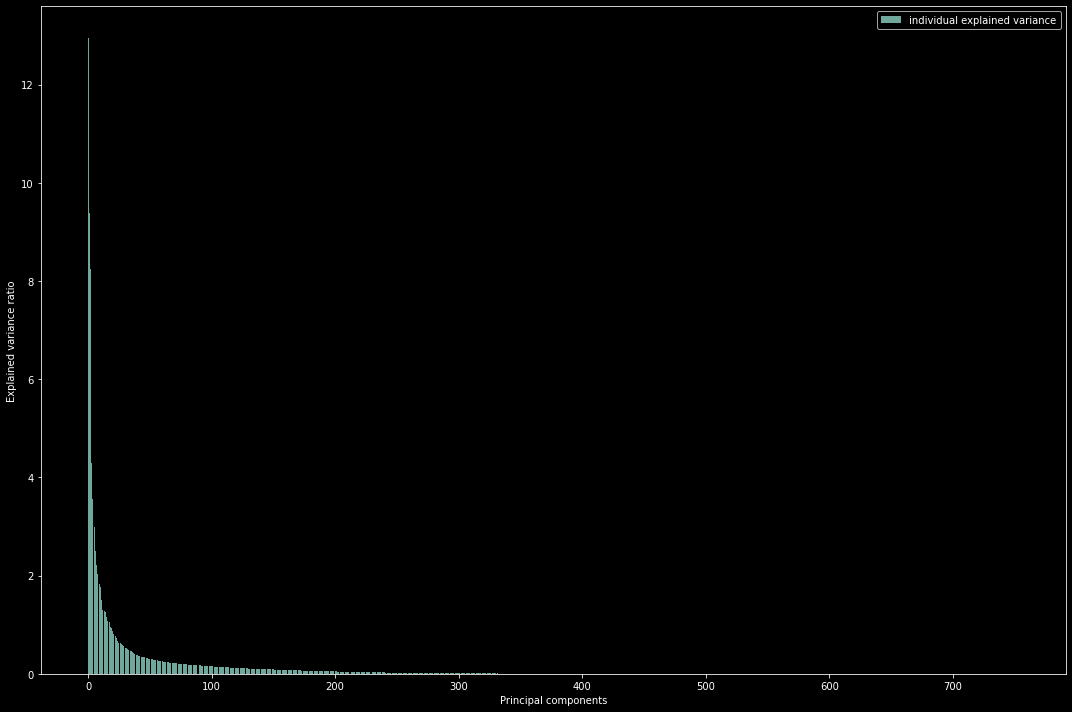

In [17]:

import matplotlib.pyplot as plt

with plt.style.context('dark_background'):
    plt.figure(figsize=(15, 10))

    plt.bar(range(len(eigenvalues)), varariance, alpha=0.8, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [18]:
varariance[0]

12.94549764912824

**Projection Matrix** 
The projection matrix is used to transform the Input data (X) into the new property subspace. The Projection Matrix is a matrix of combined upper k eigenvectors. Here, we reduce the 4-dimensional feature space to a 2-dimensional feature subspace by selecting the "first 2" eigenvectors with the highest eigenvalues to construct our 2 dimensional eigenvector matrix.

In [19]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sorting eigenvalues and eigenvectors from higher values to lower values
eigenpairs.sort(key=lambda x: x[0], reverse=True)
eigenpairs

Output hidden; open in https://colab.research.google.com to view.

In [20]:
eigenpairs[5][1].shape

(754,)

In [21]:
# only for 6 features 
matrix_weighing = np.hstack((eigenpairs[0][1].reshape(754,1),
                      eigenpairs[1][1].reshape(754,1),
                      eigenpairs[2][1].reshape(754,1),
                      eigenpairs[3][1].reshape(754,1),
                      eigenpairs[4][1].reshape(754,1),
                      eigenpairs[5][1].reshape(754,1)))
matrix_weighing

array([[-0.00734344, -0.00116719,  0.00651538, -0.01492142, -0.02300192,
        -0.02108613],
       [ 0.04502657, -0.04700965, -0.00629257,  0.02420969,  0.01025892,
        -0.0093586 ],
       [-0.0173696 , -0.01045381, -0.05766351,  0.01222901, -0.0054791 ,
        -0.02363094],
       ...,
       [ 0.01324704,  0.00858509, -0.0217637 ,  0.01327137,  0.03581234,
         0.023377  ],
       [ 0.01942424,  0.01718094, -0.02271759,  0.01791082,  0.02336868,
         0.02014452],
       [ 0.02902069,  0.03571027, -0.02900893,  0.02433487,  0.01406922,
         0.01866721]])

## **Step 4: Projection in a New Feature Space**

Projection into the New Feature Space In this last step, we will use the 754 × 6 dimensional projection matrix W to transform our samples into the new hexahedron through the equation Y = X × W.

In [22]:
Y = X.dot(matrix_weighing)
Y.shape

(756, 6)

In [23]:
df["class"].unique()

array(['1', '0'], dtype=object)

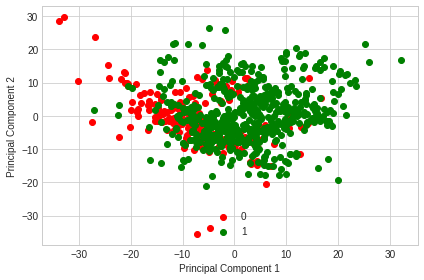

In [24]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('0', '1'), ('red', 'green')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## **Step 5: Principal Component Analysis (PCA)**

Text(0, 0.5, 'Cumulative explained variance')

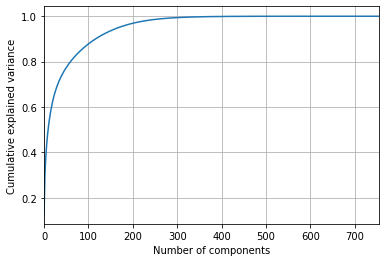

In [25]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,754,1)
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Division of training and test data**

In [26]:
# eğitim ve test kümelerinin bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Implementing Standard scaling data**

In [27]:
# Standard scaler haline getirme verileri
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)

X_train shape =  (604, 754)
X_test shape =  (152, 754)


**Preparation of new data set to be used in training models. Principal Component Analysis(PCA) implementation. Feature extraction of the data set. And the size reduction has been done.**

In [28]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)

X_train2 = pca.fit_transform(X_train) # sadece bir tane PCA ile çalışıyor aynı uzayda olması için
X_test2 = pca.transform(X_test)       # test verisini eğitmiyoruz sadece transform uyguluyoruz

print("X_train2 shape = ",X_train2.shape)
print("X_test2 shape = ",X_test2.shape)


X_train2 shape =  (604, 6)
X_test2 shape =  (152, 6)


#**Step 6: Model Uygulanması**

## **1. Model : Logistic Regression**

**Before PCA**

In [29]:
#pca dönüşümünden önce gelen Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**After PCA**

In [30]:

#pca dönüşümünden sonra gelen LR
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X_train2,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Success comparison of PCA and non-PCA models**

In [32]:
#Predictions : tahminler
y_pred = classifier.predict(X_test)    # without PCA
y_pred2 = classifier2.predict(X_test2) # after PCA

**Comparison between real and before PCA**

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#actual / PCA olmadan çıkan sonuç
print("Comparison between real and before PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Comparison between real and before PCA
Accuracy Score: 0.8092105263157895
Confusion matrix 
 [[25 13]
 [16 98]]
Classification 
               precision    recall  f1-score   support

           0       0.61      0.66      0.63        38
           1       0.88      0.86      0.87       114

    accuracy                           0.81       152
   macro avg       0.75      0.76      0.75       152
weighted avg       0.81      0.81      0.81       152



**Comparison between real and before PCA**

In [35]:
#actual / PCA sonrası çıkan sonuç
print("Comparison between real and after PCA ")

print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))



Comparison between real and after PCA 
Accuracy Score: 0.8157894736842105
Confusion matrix 
 [[ 19  19]
 [  9 105]]
Classification 
               precision    recall  f1-score   support

           0       0.68      0.50      0.58        38
           1       0.85      0.92      0.88       114

    accuracy                           0.82       152
   macro avg       0.76      0.71      0.73       152
weighted avg       0.80      0.82      0.81       152



## **2. Model : Support Vector Machines (SVM)**

**Comparison between real and before PCA**

In [36]:

#Support Vector Machine
from sklearn.svm import SVC
 

classifier = SVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")

print("Comparison between real and before PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Support Vector Machine:
Comparison between real and before PCA
Accuracy Score: 0.8355263157894737
Confusion matrix 
 [[ 17  21]
 [  4 110]]
Classification 
               precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.84      0.96      0.90       114

    accuracy                           0.84       152
   macro avg       0.82      0.71      0.74       152
weighted avg       0.83      0.84      0.82       152



**Comparison between real and after PCA**

In [37]:

#Support Vector Machine
from sklearn.svm import SVC
 

classifier = SVC()
classifier.fit(X_train2,y_train)
y_pred2 = classifier.predict(X_test2)
cm = confusion_matrix(y_test,y_pred2)
accuracy = accuracy_score(y_test,y_pred2)
print("Support Vector Machine:")

print("Comparison between real and after PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))

Support Vector Machine:
Comparison between real and after PCA
Accuracy Score: 0.8289473684210527
Confusion matrix 
 [[ 19  19]
 [  7 107]]
Classification 
               precision    recall  f1-score   support

           0       0.73      0.50      0.59        38
           1       0.85      0.94      0.89       114

    accuracy                           0.83       152
   macro avg       0.79      0.72      0.74       152
weighted avg       0.82      0.83      0.82       152



##**3. Model : Decision Tree Classifier**

**Comparison between real and before PCA**

In [38]:

from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print("Decision Tree Classifier :")

print("Comparison between real and before PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Decision Tree Classifier :
Comparison between real and before PCA
Accuracy Score: 0.8552631578947368
Confusion matrix 
 [[ 25  13]
 [  9 105]]
Classification 
               precision    recall  f1-score   support

           0       0.74      0.66      0.69        38
           1       0.89      0.92      0.91       114

    accuracy                           0.86       152
   macro avg       0.81      0.79      0.80       152
weighted avg       0.85      0.86      0.85       152



**Comparison between real and after PCA**

In [40]:

from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train2,y_train)
y_pred2 = classifier.predict(X_test2)


print("Comparison between real and after PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))

Comparison between real and after PCA
Accuracy Score: 0.756578947368421
Confusion matrix 
 [[23 15]
 [22 92]]
Classification 
               precision    recall  f1-score   support

           0       0.51      0.61      0.55        38
           1       0.86      0.81      0.83       114

    accuracy                           0.76       152
   macro avg       0.69      0.71      0.69       152
weighted avg       0.77      0.76      0.76       152



## **4. Model : KNN(k-nearest neighbors algorithm)**

**Comparison between real and before PCA**

In [41]:

from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("K-Neighbors Classifier :")

print("Comparison between real and before PCA")

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

K-Neighbors Classifier :
Comparison between real and before PCA
Accuracy Score: 0.8421052631578947
Confusion matrix 
 [[ 21  17]
 [  7 107]]
Classification 
               precision    recall  f1-score   support

           0       0.75      0.55      0.64        38
           1       0.86      0.94      0.90       114

    accuracy                           0.84       152
   macro avg       0.81      0.75      0.77       152
weighted avg       0.83      0.84      0.83       152



**Comparison between real and after PCA**

In [43]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
y_pred2 = knn.predict(X_test2)

print("Comparison between real and after PCA")
print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))

Comparison between real and after PCA
Accuracy Score: 0.8026315789473685
Confusion matrix 
 [[ 21  17]
 [ 13 101]]
Classification 
               precision    recall  f1-score   support

           0       0.62      0.55      0.58        38
           1       0.86      0.89      0.87       114

    accuracy                           0.80       152
   macro avg       0.74      0.72      0.73       152
weighted avg       0.80      0.80      0.80       152



##**5. Model : Random Forest Classifier**

**Comparison between real and before PCA**

In [44]:

from sklearn.ensemble import RandomForestClassifier as RF

classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print("Random Forest Classifier :")

print("Comparison between real and before PCA")
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Random Forest Classifier :
Comparison between real and before PCA
Accuracy Score: 0.8355263157894737
Confusion matrix 
 [[ 20  18]
 [  7 107]]
Classification 
               precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.86      0.94      0.90       114

    accuracy                           0.84       152
   macro avg       0.80      0.73      0.76       152
weighted avg       0.83      0.84      0.83       152



**Comparison between real and after PCA**

In [49]:

from sklearn.ensemble import RandomForestClassifier as RF

classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train2,y_train)
y_pred2 = classifier.predict(X_test2)

print("Comparison between real and after PCA")
print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))

Comparison between real and after PCA
Accuracy Score: 0.8157894736842105
Confusion matrix 
 [[ 23  15]
 [ 13 101]]
Classification 
               precision    recall  f1-score   support

           0       0.64      0.61      0.62        38
           1       0.87      0.89      0.88       114

    accuracy                           0.82       152
   macro avg       0.75      0.75      0.75       152
weighted avg       0.81      0.82      0.81       152



##**6. Model:  Gaussian Naive Bayes**

**Comparison between real and before PCA**

In [51]:

#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print("Gaussian Naive Bayes :")

print("Comparison between real and before PCA")
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))

Gaussian Naive Bayes :
Comparison between real and before PCA
Accuracy Score: 0.7894736842105263
Confusion matrix 
 [[24 14]
 [18 96]]
Classification 
               precision    recall  f1-score   support

           0       0.57      0.63      0.60        38
           1       0.87      0.84      0.86       114

    accuracy                           0.79       152
   macro avg       0.72      0.74      0.73       152
weighted avg       0.80      0.79      0.79       152



**Comparison between real and after PCA**

In [50]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train2,y_train)
y_pred2 = classifier.predict(X_test2)

print("Comparison between real and after PCA")
print('Accuracy Score:', accuracy_score(y_test, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred2))
print('Classification \n', classification_report(y_test, y_pred2))

Comparison between real and after PCA
Accuracy Score: 0.75
Confusion matrix 
 [[ 10  28]
 [ 10 104]]
Classification 
               precision    recall  f1-score   support

           0       0.50      0.26      0.34        38
           1       0.79      0.91      0.85       114

    accuracy                           0.75       152
   macro avg       0.64      0.59      0.60       152
weighted avg       0.72      0.75      0.72       152

